In [1]:
import pandas as pd
import numpy as np

# load the data and change the 100 dB into 0 dB in the data 
path = 'C:/software/WinPython/notebooks/indoor position/long_term_datasets'
train_rss = pd.read_csv(path + '/train_rss.csv',header  = None)
train_coord = pd.read_csv(path + '/train_coords.csv', header  = None)
train_rss = train_rss.replace(100, 0)

test_rss = pd.read_csv(path + '/test_rss.csv',header  = None)
test_coord = pd.read_csv(path + '/test_coords.csv',header  = None)
test_rss = test_rss.replace(100, 0)

In [2]:
print(train_rss.shape)
print(test_rss.shape)

(16704, 448)
(46800, 448)


In [3]:
# combine the Rss value with coordinate

train = pd.concat([train_rss, train_coord], axis=1, ignore_index=True)
test = pd.concat([test_rss, test_coord], axis=1, ignore_index=True)
train_ar = train.values
test_ar = test.values
print(train)


       0    1    2    3    4    5    6    7    8    9   ...   441  442  443  \
0      -90  -62  -69  -87  -85  -87  -68  -86  -63  -85 ...     0    0    0   
1      -93  -65  -67  -85  -88  -87  -67  -86  -66  -88 ...     0    0    0   
2      -88  -64  -68  -88  -86  -90  -68  -88  -66  -86 ...     0    0    0   
3      -90  -63  -66  -87  -88  -91  -67  -86  -64  -85 ...     0    0    0   
4        0  -64  -68  -88    0  -88  -66  -88  -63  -86 ...     0    0    0   
5        0  -65  -67  -85  -87  -89  -66  -89  -65  -87 ...     0    0    0   
6        0  -47  -57  -94  -83    0  -57    0  -46  -84 ...     0    0    0   
7        0  -46  -56    0  -84    0  -56    0  -46  -85 ...     0    0    0   
8        0  -46  -56    0  -83    0  -55    0  -47  -84 ...     0    0    0   
9        0  -47  -56    0  -85    0  -56    0  -44  -85 ...     0    0    0   
10       0  -46  -55    0  -84    0  -55    0  -46  -83 ...     0    0    0   
11       0  -49  -55    0  -84    0  -55    0  -47  

In [247]:
print(train.columns)

RangeIndex(start=0, stop=451, step=1)


In [4]:
# get the train data group by it coordinate
train_group = train.groupby([448,449,450])
train_group.describe()

0                                                        \
                    count       mean        std   min    25%   50%   75%  max   
448     449    450                                                              
4.1254  16.691 3    348.0 -10.666667  29.237640 -95.0   0.00   0.0   0.0  0.0   
               5    348.0 -68.528736  29.735274 -91.0 -84.00 -80.0 -75.0  0.0   
        18.479 3    348.0  -4.425287  19.557869 -94.0   0.00   0.0   0.0  0.0   
               5    348.0 -60.887931  37.783801 -93.0 -86.00 -82.0   0.0  0.0   
        20.267 3    348.0  -7.727011  25.197723 -93.0   0.00   0.0   0.0  0.0   
               5    348.0 -56.264368  39.984495 -94.0 -86.25 -81.0   0.0  0.0   
        22.055 3    348.0 -17.221264  35.326063 -94.0   0.00   0.0   0.0  0.0   
               5    348.0 -41.362069  43.425858 -94.0 -86.00   0.0   0.0  0.0   
        23.843 3    348.0 -20.364943  37.341892 -94.0   0.00   0.0   0.0  0.0   
               5    348.0 -33.281609  42.658702 -94.0 -87.00   0.0   0.0  0.0   
        25.631 3    348.0 -19.045977  36.400402 -93.0   0.00   0.0   0.0  0.0   
               5    348.0 -29.497126  40.754024 -95.0 -84.00   0.0   0.0  0.0   
        27.419 3    348.0  -3.089080  16.372487 -92.0   0.00   0.0   0.0  0.0   
               5    348.0 -23.864943  39.303909 -93.0 -85.00   0.0   0.0  0.0   
        29.208 3    348.0 -12.209770  30.588356 -98.0   0.00   0.0   0.0  0.0   
               5    348.0  -8.022989  25.700773 -94.0   0.00   0.0   0.0  0.0   
8.5149  16.691 3    348.0 -22.778736  38.931106 -95.0 -85.00   0.0   0.0  0.0   
               5    348.0 -65.770115  27.518483 -89.0 -81.00 -75.0 -70.0  0.0   
        18.479 3    348.0 -24.017241  39.546197 -92.0 -86.00   0.0   0.0  0.0   
               5    348.0 -65.683908  31.911135 -94.0 -85.00 -78.0 -73.0  0.0   
        20.267 3    348.0 -22.451149  38.662367 -93.0 -84.00   0.0   0.0  0.0   
               5    348.0 -63.678161  33.836356 -94.0 -85.00 -78.0 -71.0  0.0   
        22.055 3    348.0 -25.793103  39.864508 -92.0 -84.00   0.0   0.0  0.0   
               5    348.0 -55.212644  39.339953 -96.0 -85.00 -78.0   0.0  0.0   
        23.843 3    348.0 -28.557471  40.747690 -93.0 -84.00   0.0   0.0  0.0   
               5    348.0 -49.327586  41.877296 -96.0 -85.25 -80.0   0.0  0.0   
        25.631 3    348.0 -23.491379  38.695403 -92.0 -83.00   0.0   0.0  0.0   
               5    348.0 -44.522989  43.396397 -94.0 -87.00 -80.0   0.0  0.0   
        27.419 3    348.0 -22.089080  38.043818 -94.0 -82.00   0.0   0.0  0.0   
               5    348.0 -33.321839  41.966913 -97.0 -84.00   0.0   0.0  0.0   
        29.208 3    348.0 -24.206897  39.026818 -95.0 -83.00   0.0   0.0  0.0   
               5    348.0 -30.640805  41.529480 -94.0 -85.00   0.0   0.0  0.0   
12.9040 16.691 3    348.0 -46.589080  42.861086 -93.0 -87.00 -81.0   0.0  0.0   
               5    348.0 -62.408046  25.636005 -88.0 -76.00 -71.0 -65.0  0.0   
        18.479 3    348.0 -50.770115  42.795459 -95.0 -88.00 -83.0   0.0  0.0   
               5    348.0 -60.089080  25.217111 -92.0 -75.00 -67.0 -60.0  0.0   
        20.267 3    348.0 -60.057471  37.077334 -93.0 -85.00 -80.0   0.0  0.0   
               5    348.0 -62.353448  25.746353 -89.0 -77.00 -71.0 -64.0  0.0   
        22.055 3    348.0 -56.833333  39.193613 -94.0 -87.00 -80.0   0.0  0.0   
               5    348.0 -62.364943  26.865695 -89.0 -80.00 -71.0 -61.0  0.0   
        23.843 3    348.0 -56.057471  38.403547 -93.0 -85.00 -78.0   0.0  0.0   
               5    348.0 -65.502874  28.903048 -91.0 -82.00 -77.0 -70.0  0.0   
        25.631 3    348.0 -53.137931  39.334572 -91.0 -84.00 -77.0   0.0  0.0   
               5    348.0 -65.304598  32.593369 -93.0 -85.00 -79.0 -73.0  0.0   
        27.419 3    348.0 -56.543103  38.713920 -92.0 -85.00 -79.0   0.0  0.0   
               5    348.0 -66.336207  31.313312 -92.0 -84.00 -79.0 -73.0  0.0   
        29.208 3    348.0 -51.951149  39.896558 -93.0

In [6]:
# the test date group by coordinate
test_group = test.groupby([448,449,450])
test_group.describe()

0                                                       \
                    count       mean        std   min    25%   50%  75%  max   
448     449    450                                                             
3.1254  16.691 3    180.0  -6.444444  23.166683 -92.0   0.00   0.0  0.0  0.0   
               5    180.0 -52.016667  38.450501 -89.0 -82.00 -76.5  0.0  0.0   
        18.479 3    180.0  -2.522222  14.967919 -93.0   0.00   0.0  0.0  0.0   
               5    180.0 -48.144444  41.812580 -92.0 -85.00 -80.5  0.0  0.0   
        20.267 3    180.0  -6.527778  23.464327 -92.0   0.00   0.0  0.0  0.0   
               5    180.0 -47.650000  42.316904 -91.0 -85.00 -81.0  0.0  0.0   
        22.055 3    180.0  -7.005556  24.193008 -93.0   0.00   0.0  0.0  0.0   
               5    180.0 -37.333333  43.339894 -93.0 -87.00   0.0  0.0  0.0   
        23.843 3    180.0 -10.538889  29.086149 -95.0   0.00   0.0  0.0  0.0   
               5    180.0 -32.600000  42.473995 -94.0 -86.00   0.0  0.0  0.0   
        25.631 3    180.0 -17.683333  35.480497 -94.0   0.00   0.0  0.0  0.0   
               5    180.0 -24.372222  38.899818 -92.0 -83.00   0.0  0.0  0.0   
        27.419 3    180.0  -2.033333  13.526262 -93.0   0.00   0.0  0.0  0.0   
               5    180.0 -22.250000  38.096742 -92.0 -82.25   0.0  0.0  0.0   
        29.208 3    180.0  -9.461111  27.622023 -92.0   0.00   0.0  0.0  0.0   
               5    180.0  -8.016667  25.740752 -93.0   0.00   0.0  0.0  0.0   
4.1254  16.691 3    360.0  -4.011111  18.627110 -93.0   0.00   0.0  0.0  0.0   
               5    360.0 -50.744444  38.604649 -91.0 -81.00 -76.0  0.0  0.0   
        18.479 3    360.0  -3.280556  16.974720 -95.0   0.00   0.0  0.0  0.0   
               5    360.0 -50.297222  41.437915 -93.0 -85.00 -81.0  0.0  0.0   
        20.267 3    360.0 -13.391667  31.929927 -94.0   0.00   0.0  0.0  0.0   
               5    360.0 -48.191667  42.515531 -93.0 -86.00 -81.0  0.0  0.0   
        22.055 3    360.0 -13.388889  31.924334 -93.0   0.00   0.0  0.0  0.0   
               5    360.0 -41.327778  43.312408 -92.0 -86.00   0.0  0.0  0.0   
        23.843 3    360.0 -17.722222  35.506060 -94.0   0.00   0.0  0.0  0.0   
               5    360.0 -32.930556  42.345287 -93.0 -86.00   0.0  0.0  0.0   
        25.631 3    360.0 -15.713889  33.859514 -95.0   0.00   0.0  0.0  0.0   
               5    360.0 -26.280556  39.956267 -93.0 -85.00   0.0  0.0  0.0   
        27.419 3    360.0  -6.266667  22.974274 -93.0   0.00   0.0  0.0  0.0   
               5    360.0 -19.083333  36.651316 -96.0   0.00   0.0  0.0  0.0   
...                   ...        ...        ...   ...    ...   ...  ...  ...   
12.9040 18.479 3    360.0 -42.513889  42.406638 -95.0 -85.00 -76.5  0.0  0.0   
               5    360.0 -45.747222  33.553765 -88.0 -71.00 -63.0  0.0  0.0   
        20.267 3    360.0 -44.922222  40.374218 -91.0 -81.00 -75.0  0.0  0.0   
               5    360.0 -49.066667  35.159501 -89.0 -76.25 -68.0  0.0  0.0   
        22.055 3    360.0 -43.094444  40.965057 -92.0 -82.00 -74.5  0.0  0.0   
               5    360.0 -50.494444  36.072891 -90.0 -77.00 -72.0  0.0  0.0   
        23.843 3    360.0 -44.766667  40.708434 -92.0 -82.00 -75.0  0.0  0.0   
               5    360.0 -50.855556  38.087002 -91.0 -80.00 -75.0  0.0  0.0   
        25.631 3    360.0 -43.738889  40.642043 -93.0 -81.00 -75.0  0.0  0.0   
               5    360.0 -51.475000  38.927251 -91.0 -82.00 -77.0  0.0  0.0   
        27.419 3    360.0 -44.013889  40.455035 -94.0 -81.00 -75.0  0.0  0.0   
               5    360.0 -52.163889  38.752171 -93.0 -82.00 -77.0  0.0  0.0   
        29.208 3    360.0 -45.641667  40.338359 -92.0 -81.00 -75.0  0.0  0.0   
               5    360.0 -51.561111  40.581314 -95.0 -84.00 -80.0  0.0  0.0   
13.9040 16.691 3    180.0 -39.822222  42.307356 -92.0 -83.25   0.0  0.0  0.0   
               5    180.0 -44.233333  32.227040 -87.0 -71.00 -58.0  0.0  0.0   
        18.479 3    18

In [209]:
train_group[1]

In [249]:
# # train_mean is not related to this cnn code
# train_mean = train_group.mean()
# print(train_mean)

                          0           1           2          3           4    \
448     449    450                                                             
4.1254  16.691 3    77.551724  -25.867816   27.965517  96.706897   96.732759   
               5   -53.011494  100.000000  100.000000 -25.367816  100.000000   
        18.479 3    90.689655  -15.152299  -22.025862  98.910920   99.454023   
               5   -33.301724  100.000000  100.000000 -12.497126  100.000000   
        20.267 3    83.652299  -44.712644  -50.784483  70.218391   82.520115   
               5   -22.931034  100.000000  100.000000 -12.591954  100.000000   
        22.055 3    63.525862  -49.750000  -51.813218  67.617816   77.074713   
               5    10.936782  100.000000   98.905172  16.468391  100.000000   
        23.843 3    56.646552  -52.577586  -53.353448  73.910920   50.689655   
               5    28.787356   98.336207   76.663793  29.123563  100.000000   
        25.631 3    59.402299  -47.08908

[48 rows x 448 columns]


In [250]:
# train_mean.iloc[0]
# train_mean_coord = train_mean.index.tolist()
# train_mean_coord = np.array(train_mean_coord)
# train_mean_coord
# print(train_mean_coord)
# train_mean_rss = train_mean.values

[[  4.1254  16.691    3.    ]
 [  4.1254  16.691    5.    ]
 [  4.1254  18.479    3.    ]
 [  4.1254  18.479    5.    ]
 [  4.1254  20.267    3.    ]
 [  4.1254  20.267    5.    ]
 [  4.1254  22.055    3.    ]
 [  4.1254  22.055    5.    ]
 [  4.1254  23.843    3.    ]
 [  4.1254  23.843    5.    ]
 [  4.1254  25.631    3.    ]
 [  4.1254  25.631    5.    ]
 [  4.1254  27.419    3.    ]
 [  4.1254  27.419    5.    ]
 [  4.1254  29.208    3.    ]
 [  4.1254  29.208    5.    ]
 [  8.5149  16.691    3.    ]
 [  8.5149  16.691    5.    ]
 [  8.5149  18.479    3.    ]
 [  8.5149  18.479    5.    ]
 [  8.5149  20.267    3.    ]
 [  8.5149  20.267    5.    ]
 [  8.5149  22.055    3.    ]
 [  8.5149  22.055    5.    ]
 [  8.5149  23.843    3.    ]
 [  8.5149  23.843    5.    ]
 [  8.5149  25.631    3.    ]
 [  8.5149  25.631    5.    ]
 [  8.5149  27.419    3.    ]
 [  8.5149  27.419    5.    ]
 [  8.5149  29.208    3.    ]
 [  8.5149  29.208    5.    ]
 [ 12.904   16.691    3.    ]
 [ 12.904 

In [7]:
# get the train index of dataframe
indexs = train_group.groups.keys()
print(indexs)

dict_keys([(4.1254, 16.691, 3), (4.1254, 16.691, 5), (4.1254, 18.479, 3), (4.1254, 18.479, 5), (4.1254, 20.267, 3), (4.1254, 20.267, 5), (4.1254, 22.055, 3), (4.1254, 22.055, 5), (4.1254, 23.843000000000004, 3), (4.1254, 23.843000000000004, 5), (4.1254, 25.631, 3), (4.1254, 25.631, 5), (4.1254, 27.419, 3), (4.1254, 27.419, 5), (4.1254, 29.208000000000002, 3), (4.1254, 29.208000000000002, 5), (8.5149, 16.691, 3), (8.5149, 16.691, 5), (8.5149, 18.479, 3), (8.5149, 18.479, 5), (8.5149, 20.267, 3), (8.5149, 20.267, 5), (8.5149, 22.055, 3), (8.5149, 22.055, 5), (8.5149, 23.843000000000004, 3), (8.5149, 23.843000000000004, 5), (8.5149, 25.631, 3), (8.5149, 25.631, 5), (8.5149, 27.419, 3), (8.5149, 27.419, 5), (8.5149, 29.208000000000002, 3), (8.5149, 29.208000000000002, 5), (12.904000000000002, 16.691, 3), (12.904000000000002, 16.691, 5), (12.904000000000002, 18.479, 3), (12.904000000000002, 18.479, 5), (12.904000000000002, 20.267, 3), (12.904000000000002, 20.267, 5), (12.904000000000002, 22

In [9]:
# get the text index
t_indexs = test_group.groups.keys()
print(t_indexs)

dict_keys([(3.1254, 16.691, 3), (3.1254, 16.691, 5), (3.1254, 18.479, 3), (3.1254, 18.479, 5), (3.1254, 20.267, 3), (3.1254, 20.267, 5), (3.1254, 22.055, 3), (3.1254, 22.055, 5), (3.1254, 23.843000000000004, 3), (3.1254, 23.843000000000004, 5), (3.1254, 25.631, 3), (3.1254, 25.631, 5), (3.1254, 27.419, 3), (3.1254, 27.419, 5), (3.1254, 29.208000000000002, 3), (3.1254, 29.208000000000002, 5), (4.1254, 16.691, 3), (4.1254, 16.691, 5), (4.1254, 18.479, 3), (4.1254, 18.479, 5), (4.1254, 20.267, 3), (4.1254, 20.267, 5), (4.1254, 22.055, 3), (4.1254, 22.055, 5), (4.1254, 23.843000000000004, 3), (4.1254, 23.843000000000004, 5), (4.1254, 25.631, 3), (4.1254, 25.631, 5), (4.1254, 27.419, 3), (4.1254, 27.419, 5), (4.1254, 29.208000000000002, 3), (4.1254, 29.208000000000002, 5), (5.1254, 16.691, 3), (5.1254, 16.691, 5), (5.1254, 18.479, 3), (5.1254, 18.479, 5), (5.1254, 20.267, 3), (5.1254, 20.267, 5), (5.1254, 22.055, 3), (5.1254, 22.055, 5), (5.1254, 23.843000000000004, 3), (5.1254, 23.84300000

In [ ]:
# convert the locaiton into local one
def predata(locations):
    # the origin of the room
    origin = np.amin(locations,axis=0)
    #size of the room
    room_size = np.amax(locations, axis=0)-origin
    # position respect to origin
    train_Yy = locations - origin
    return train_Yy

In [10]:
# convert the 3rd floor data into image form  and 5th floor data into image form
from numpy import newaxis
all_train_array3 = []
all_train_array5 = []
coord_index3 = []
coord_index5 = []
coord_labely3 = []
coord_labely5 = []

rss3 = []
rss5 = []

# group the data by the same coordinate
for i in indexs:
    m = list(i) 
    # if the coordinate is in the 3rd floor
    if m[2] == 3:
        # get_group is a funcation that return the dataframe include index and value
        train_position = train_group.get_group(i)
        train_array = train_position.values
        all_train_array3.append(train_array)  
        n3 = np.array(i)
        n3 = np.delete(n3, 2)
        coord_index3.append(n3)
        
        # split matrix into 6 rows  
        m3 = np.vsplit(train_array, 58)
        for h3 in m3:
            labely3 = n3
           # print(h3)
            rss3.append(h3)
            coord_labely3.append(labely3)
            
    # if the coordinate is in the 5th floor  
    elif m[2] == 5:
        train_position = train_group.get_group(i)
        train_array2 = train_position.values
        
        
        all_train_array5.append(train_array2)
        n5 = np.array(i)
        n5 = np.delete(n5, 2)
        coord_index5.append(n5)

       # matrix split into 6 rows
        m5 = np.vsplit(train_array2, 58)        
        for h5 in m5:
            labely5 = n5
            rss5.append(h5)
            coord_labely5.append(labely5)
        
coord_index3 = np.array(coord_index3)
coord_index5 = np.array(coord_index5)
coord_labely3 = np.array(coord_labely3)
coord_labely5 = np.array(coord_labely5)
all_train_array3 = np.array(all_train_array3)
all_train_array5 = np.array(all_train_array5)

rss3 = np.array(rss3)
rss5 = np.array(rss5)
print("coord_index3", coord_index3)
print("coord_index5", coord_index5)
print(all_train_array3)

[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0 -91   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0 -92   0 ...,   0   0   0]
 [  0 -92   0 ...,   0   0   0]]
[[  0 -88 -84 ...,   0   0   0]
 [  0 -89 -86 ...,   0   0   0]
 [-95 -89 -87 ...,   0   0   0]
 [-94 -88 -87 ...,   0   0   0]
 [  0 -88 -85 ...,   0   0   0]
 [  0 -89 -89 ...,   0   0   0]]
[[  0 -93 -86 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]
[[  0 -84   0 ...,   0   0   0]
 [  0 -86   0 ...,   0   0   0]
 [  0 -91   0 ...,   0   0   0]
 [  0 -90   0 ...,   0   0   0]
 [  0 -93   0 ...,   0   0   0]
 [  0 -93 -90 ...,   0   0   0]]
[[  0 -90 -87 ...,   0   0   0]
 [  0 -95 -89 ...,   0   0   0]
 [  0   0 -87 ...,   0   0   0]
 [  0 -94 -89 ...,   0   0   0]
 [  0 -92 -85 ...,   0   0   0]
 [  0 -93   0 ...,   0   0   0]]
[[-88   0 -82 ...,   0   0   0]
 [-

[[  0 -82 -81 ...,   0   0   0]
 [  0   0 -82 ...,   0   0   0]
 [  0   0 -83 ...,   0   0   0]
 [  0 -91 -80 ...,   0   0   0]
 [  0 -90 -80 ...,   0   0   0]
 [  0   0 -82 ...,   0   0   0]]
[[  0 -78 -90 ...,   0   0   0]
 [  0 -78 -88 ...,   0   0   0]
 [-94 -78 -91 ...,   0   0   0]
 [  0 -80 -87 ...,   0   0   0]
 [  0 -79 -87 ...,   0   0   0]
 [-92 -79 -87 ...,   0   0   0]]
[[  0 -89 -79 ...,   0   0   0]
 [  0 -88 -82 ...,   0   0   0]
 [  0 -88 -81 ...,   0   0   0]
 [  0   0 -85 ...,   0   0   0]
 [  0 -88 -87 ...,   0   0   0]
 [  0 -86 -86 ...,   0   0   0]]
[[  0 -82 -80 ...,   0   0   0]
 [  0 -85 -82 ...,   0   0   0]
 [  0 -87 -80 ...,   0   0   0]
 [  0 -87 -80 ...,   0   0   0]
 [  0 -85 -81 ...,   0   0   0]
 [  0 -86 -82 ...,   0   0   0]]
[[  0 -84 -84 ...,   0   0   0]
 [  0 -83 -77 ...,   0   0   0]
 [  0 -85 -79 ...,   0   0   0]
 [  0 -84 -79 ...,   0   0   0]
 [  0 -87 -77 ...,   0   0   0]
 [  0 -84 -77 ...,   0   0   0]]
[[  0 -80 -82 ...,   0   0   0]
 [ 

In [55]:
# show the training Rss value's shape
print(rss3[-1].shape)

(6, 448)


In [11]:
print(coord_index5, rss5)

[[  4.1254  16.691 ]
 [  4.1254  18.479 ]
 [  4.1254  20.267 ]
 [  4.1254  22.055 ]
 [  4.1254  23.843 ]
 [  4.1254  25.631 ]
 [  4.1254  27.419 ]
 [  4.1254  29.208 ]
 [  8.5149  16.691 ]
 [  8.5149  18.479 ]
 [  8.5149  20.267 ]
 [  8.5149  22.055 ]
 [  8.5149  23.843 ]
 [  8.5149  25.631 ]
 [  8.5149  27.419 ]
 [  8.5149  29.208 ]
 [ 12.904   16.691 ]
 [ 12.904   18.479 ]
 [ 12.904   20.267 ]
 [ 12.904   22.055 ]
 [ 12.904   23.843 ]
 [ 12.904   25.631 ]
 [ 12.904   27.419 ]
 [ 12.904   29.208 ]] [[[-88   0   0 ...,   0   0   0]
  [-87   0   0 ...,   0   0   0]
  [-86   0   0 ...,   0   0   0]
  [-86   0   0 ...,   0   0   0]
  [  0   0   0 ...,   0   0   0]
  [-88   0   0 ...,   0   0   0]]

 [[-85   0   0 ...,   0   0   0]
  [-84   0   0 ...,   0   0   0]
  [-88   0   0 ...,   0   0   0]
  [-85   0   0 ...,   0   0   0]
  [-88   0   0 ...,   0   0   0]
  [-86   0   0 ...,   0   0   0]]

 [[-83   0   0 ...,   0   0   0]
  [-88   0   0 ...,   0   0   0]
  [-84   0   0 ...,   0   0  

In [48]:
# convert the 3rd floor test data into image form  and 5th floor test data into image form
from numpy import newaxis
all_test_array3 = []
all_test_array5 = []
t_coord_index3 = []
t_coord_index5 = []
t_coord_labely3 = []
t_coord_labely5 = []

t_rss3 = []
t_rss5 = []


for i in t_indexs:
    t_m = list(i)    
    if t_m[2] == 3:
        test_position = test_group.get_group(i)
        test_array = test_position.values
        all_test_array3.append(test_array)  
        t_n3 = np.array(i)
        t_n3 = np.delete(t_n3, 2)   
        t_coord_index3.append(t_n3)
        
        # split matrix into 6 rows  
        t_m3 = np.vsplit(test_array, np.arange(6,test_array2.shape[0],6))
        for t_h3 in t_m3:
            t_labely3 = t_n3
#             print(h3)
            t_rss3.append(t_h3)
            t_coord_labely3.append(t_labely3)
            
    elif t_m[2] == 5:
        test_position = test_group.get_group(i)
        test_array2 = test_position.values
        
        all_test_array5.append(test_array2)
        t_n5 = np.array(i)
        t_n5 = np.delete(t_n5, 2)
        t_coord_index5.append(t_n5)

       # matrix split into 6 rows, https://stackoverflow.com/questions/38302523/python-numpy-matrix-split
        t_m5 = np.vsplit(test_array2, np.arange(6,test_array2.shape[0],6))        
        for t_h5 in t_m5:
            t_labely5 = t_n5
            t_rss5.append(t_h5)
            t_coord_labely5.append(t_labely5)
        
t_coord_index3 = np.array(t_coord_index3)
t_coord_index5 = np.array(t_coord_index5)
t_coord_labely3 = np.array(t_coord_labely3)
t_coord_labely5 = np.array(t_coord_labely5)
all_test_array3 = np.array(all_test_array3)
all_test_array5 = np.array(all_test_array5)

t_rss3 = np.array(t_rss3)
t_rss5 = np.array(t_rss5)
print("coord_index3", t_coord_index3)
print("coord_index5", t_coord_index5)
print(all_test_array3)

coord_index3 [[  3.1254  16.691 ]
 [  3.1254  18.479 ]
 [  3.1254  20.267 ]
 [  3.1254  22.055 ]
 [  3.1254  23.843 ]
 [  3.1254  25.631 ]
 [  3.1254  27.419 ]
 [  3.1254  29.208 ]
 [  4.1254  16.691 ]
 [  4.1254  18.479 ]
 [  4.1254  20.267 ]
 [  4.1254  22.055 ]
 [  4.1254  23.843 ]
 [  4.1254  25.631 ]
 [  4.1254  27.419 ]
 [  4.1254  29.208 ]
 [  5.1254  16.691 ]
 [  5.1254  18.479 ]
 [  5.1254  20.267 ]
 [  5.1254  22.055 ]
 [  5.1254  23.843 ]
 [  5.1254  25.631 ]
 [  5.1254  27.419 ]
 [  5.1254  29.208 ]
 [  6.3201  15.797 ]
 [  6.3201  16.691 ]
 [  6.3201  17.585 ]
 [  6.3201  18.479 ]
 [  6.3201  19.373 ]
 [  6.3201  20.267 ]
 [  6.3201  21.161 ]
 [  6.3201  22.055 ]
 [  6.3201  22.949 ]
 [  6.3201  23.843 ]
 [  6.3201  24.737 ]
 [  6.3201  25.631 ]
 [  6.3201  26.525 ]
 [  6.3201  27.419 ]
 [  6.3201  28.313 ]
 [  6.3201  29.208 ]
 [  6.3201  30.102 ]
 [  7.5149  16.691 ]
 [  7.5149  18.479 ]
 [  7.5149  20.267 ]
 [  7.5149  22.055 ]
 [  7.5149  23.843 ]
 [  7.5149  25.631 ]


In [58]:
print(rss5.shape)

(1392, 6, 448)


In [76]:
# just select 500 data points as test set
t2_rss5 = t_rss5[0:500]
t2_coord_index5 = t_coord_labely5 [0:500]
print(t2_coord_index5.shape)

(500, 2)


In [215]:
# for every location, there are 348 times collecting, and 448 APs.
for i in all_train_array5:
    f= i.shape
    print(f)

(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)
(348, 448)


In [62]:
from keras.preprocessing import image                  
from tqdm import tqdm

# define funcation to convert one matrix set into a kind of form, in order to take into the cnn model
def path_to_tensor(i):    
    i = i[:,:,newaxis]
    return np.expand_dims(i, axis=0)

Using TensorFlow backend.


In [63]:
# convert all matrix into the form
def paths_to_tensor(all_array):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(all_array)]
    return np.vstack(list_of_tensors)

In [64]:
train5_tensors = paths_to_tensor(rss5)

100%|██████████████████████████████████████████████████████████████████████████| 1392/1392 [00:00<00:00, 155101.11it/s]


In [65]:
test5_tensors = paths_to_tensor(t2_rss5)

100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 167077.12it/s]


In [66]:
from sklearn.model_selection import train_test_split

# define a function split the data into train and validation part
def train_val(rss, locations):
    # train_Xx, train_Yy = predata(rss, locations)
    train_x, val_x, train_y, val_y = train_test_split(rss, locations, test_size=0.25)
    return train_x, val_x, train_y, val_y

In [67]:
train5_x, val5_x, train5_y, val5_y=train_val(train5_tensors, coord_labely5)

In [94]:
# cnn model 
import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adadelta, Adam
from keras import metrics

### TODO: Define your architecture.
model = Sequential()
# First Convolution Layer with patch size = 2, stride = 1, same padding, an depth = 16 and Relu activation
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape = train5_x.shape[1:]))
# First Maxpool with kernel size = 2 and stride = 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution Layer with patch size = 2, stride = 1, same padding an depth = 32 and Relu activation
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# Second Maxpool with kernel size = 2 and stride = 2
model.add(MaxPooling2D(pool_size=2))
          
# # Third Convolution Layer with patch size = 2, stride = 1, same padding an depth = 64 and Relu activation
# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# # Third Maxpool with kernel size = 2 and stride = 2
# model.add(MaxPooling2D(pool_size=2), dim_ordering="tf")
# # add dropput to reduce overfitting
# # model.add(Dropout(0.5))
          
# Dense layer with 100 neurons and Relu activation          
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))     
# Ouput layer with softmax activation with 133 neurons same as the category
model.add(Dense(2))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 6, 448, 16)        80        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 224, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 224, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 112, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               358500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
__________

In [95]:
def accuracy(predictions, labels):
    error = np.sqrt(np.sum((predictions - labels)**2, 1))
    return error, np.mean(error)

In [96]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ['accuracy'])


In [102]:
from keras.callbacks import ModelCheckpoint 

# checkpointer = ModelCheckpoint(filepath='saved_models/weights5.best.from_scratch.hdf5', 
#                                verbose=1, save_best_only=True)

# model.fit(train5_x, train5_y, 
#           validation_data=(val5_x, val5_y),
#           epochs = 64, batch_size=20, callbacks=[checkpointer], verbose=1)


earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=60, verbose=0, mode='auto')
model.fit(train5_x, train5_y,
          epochs=100,
          batch_size=64,callbacks=[earlyStopping],validation_data=(val5_x, val5_y))#tbCallBack,

Train on 1044 samples, validate on 348 samples
Epoch 1/100
1044/1044 [==============================] - ETA: 1s - loss: 9.6011 - acc: 1.000 - ETA: 1s - loss: 10.0650 - acc: 1.00 - ETA: 1s - loss: 9.5001 - acc: 1.0000 - ETA: 1s - loss: 9.5140 - acc: 1.000 - ETA: 0s - loss: 9.5480 - acc: 1.000 - ETA: 0s - loss: 9.9653 - acc: 1.000 - ETA: 0s - loss: 10.1749 - acc: 1.00 - ETA: 0s - loss: 10.5843 - acc: 1.00 - ETA: 0s - loss: 10.6959 - acc: 1.00 - ETA: 0s - loss: 10.8027 - acc: 1.00 - ETA: 0s - loss: 10.6446 - acc: 1.00 - ETA: 0s - loss: 10.7468 - acc: 1.00 - ETA: 0s - loss: 10.5069 - acc: 1.00 - ETA: 0s - loss: 10.5486 - acc: 1.00 - ETA: 0s - loss: 10.4980 - acc: 1.00 - ETA: 0s - loss: 10.4780 - acc: 1.00 - 1s - loss: 10.3654 - acc: 1.0000 - val_loss: 5.1919 - val_acc: 1.0000
Epoch 2/100
1044/1044 [==============================] - ETA: 1s - loss: 8.6145 - acc: 1.000 - ETA: 1s - loss: 8.7299 - acc: 1.000 - ETA: 1s - loss: 9.0752 - acc: 1.000 - ETA: 1s - loss: 9.1108 - acc: 1.000 - ETA: 0s 

1044/1044 [==============================] - ETA: 1s - loss: 5.8826 - acc: 1.000 - ETA: 1s - loss: 6.8122 - acc: 1.000 - ETA: 1s - loss: 7.5714 - acc: 1.000 - ETA: 1s - loss: 7.4353 - acc: 1.000 - ETA: 0s - loss: 7.7076 - acc: 1.000 - ETA: 0s - loss: 7.9865 - acc: 1.000 - ETA: 0s - loss: 7.9094 - acc: 1.000 - ETA: 0s - loss: 8.0013 - acc: 1.000 - ETA: 0s - loss: 7.9583 - acc: 1.000 - ETA: 0s - loss: 8.3359 - acc: 1.000 - ETA: 0s - loss: 8.3448 - acc: 1.000 - ETA: 0s - loss: 8.1663 - acc: 1.000 - ETA: 0s - loss: 8.3102 - acc: 1.000 - ETA: 0s - loss: 8.4208 - acc: 1.000 - ETA: 0s - loss: 8.4531 - acc: 1.000 - ETA: 0s - loss: 8.6003 - acc: 1.000 - 1s - loss: 8.5960 - acc: 1.0000 - val_loss: 6.4683 - val_acc: 1.0000
Epoch 24/100
1044/1044 [==============================] - ETA: 1s - loss: 7.4333 - acc: 1.000 - ETA: 1s - loss: 7.8795 - acc: 1.000 - ETA: 1s - loss: 8.0134 - acc: 1.000 - ETA: 1s - loss: 8.7795 - acc: 1.000 - ETA: 0s - loss: 8.5281 - acc: 1.000 - ETA: 0s - loss: 8.4800 - acc: 

1044/1044 [==============================] - ETA: 1s - loss: 9.0053 - acc: 1.000 - ETA: 1s - loss: 8.9233 - acc: 1.000 - ETA: 1s - loss: 9.0500 - acc: 1.000 - ETA: 1s - loss: 8.6233 - acc: 1.000 - ETA: 0s - loss: 8.2782 - acc: 1.000 - ETA: 0s - loss: 8.7823 - acc: 1.000 - ETA: 0s - loss: 8.7482 - acc: 1.000 - ETA: 0s - loss: 8.4650 - acc: 1.000 - ETA: 0s - loss: 8.3807 - acc: 1.000 - ETA: 0s - loss: 8.3957 - acc: 0.998 - ETA: 0s - loss: 8.2361 - acc: 0.998 - ETA: 0s - loss: 8.3497 - acc: 0.998 - ETA: 0s - loss: 8.3580 - acc: 0.998 - ETA: 0s - loss: 8.3257 - acc: 0.998 - ETA: 0s - loss: 8.2866 - acc: 0.999 - ETA: 0s - loss: 8.2475 - acc: 0.999 - 1s - loss: 8.2676 - acc: 0.9990 - val_loss: 5.5554 - val_acc: 1.0000
Epoch 46/100
1044/1044 [==============================] - ETA: 1s - loss: 6.7280 - acc: 1.000 - ETA: 1s - loss: 6.7868 - acc: 1.000 - ETA: 1s - loss: 7.3861 - acc: 1.000 - ETA: 1s - loss: 7.6646 - acc: 1.000 - ETA: 0s - loss: 7.8731 - acc: 1.000 - ETA: 0s - loss: 8.1183 - acc: 

1044/1044 [==============================] - ETA: 1s - loss: 6.9724 - acc: 1.000 - ETA: 1s - loss: 7.6221 - acc: 1.000 - ETA: 1s - loss: 7.2422 - acc: 1.000 - ETA: 1s - loss: 8.0179 - acc: 1.000 - ETA: 0s - loss: 8.3760 - acc: 1.000 - ETA: 0s - loss: 8.0494 - acc: 1.000 - ETA: 0s - loss: 8.0458 - acc: 1.000 - ETA: 0s - loss: 8.1676 - acc: 1.000 - ETA: 0s - loss: 8.2012 - acc: 1.000 - ETA: 0s - loss: 8.1795 - acc: 1.000 - ETA: 0s - loss: 8.2059 - acc: 1.000 - ETA: 0s - loss: 8.2844 - acc: 1.000 - ETA: 0s - loss: 8.2141 - acc: 1.000 - ETA: 0s - loss: 8.2247 - acc: 1.000 - ETA: 0s - loss: 8.1384 - acc: 1.000 - ETA: 0s - loss: 8.3656 - acc: 1.000 - 1s - loss: 8.3956 - acc: 1.0000 - val_loss: 5.7845 - val_acc: 1.0000
Epoch 68/100
1044/1044 [==============================] - ETA: 1s - loss: 8.6928 - acc: 1.000 - ETA: 1s - loss: 8.6304 - acc: 1.000 - ETA: 1s - loss: 8.3958 - acc: 1.000 - ETA: 1s - loss: 8.3121 - acc: 1.000 - ETA: 0s - loss: 8.2979 - acc: 1.000 - ETA: 0s - loss: 8.2100 - acc: 

In [103]:
score = model.evaluate(val5_x, val5_y, verbose=0)
print(score)

[5.9259936508091018, 1.0]


In [104]:
# get the accuracy of the error
predict_Y=model.predict(test5_tensors)
error5, accuracy5 = accuracy(predict_Y, t2_coord_index5)
print(accuracy5)

3.47113763612


In [105]:
np.median(error5)

3.3180924871168171

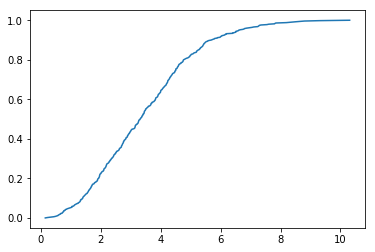

In [106]:
import matplotlib.pyplot as plt

# show the cdf of error
error_sorted= np.sort(error5)
p = 1. *np.arange(len(error5))/(len(error5)-1)
plt.plot(error_sorted, p)
plt.show()